# 📊 Italy Regional Productivity and Inflation Analysis

Questo notebook analizza due serie storiche territoriali per l’Italia:

- **la produttività del lavoro per macro-area** (2015–2023), misurata come valore aggiunto per unità di lavoro  
- **l’indice dei prezzi al consumo FOI** (2016–2025), utilizzato per descrivere l’andamento dei prezzi e il costo della vita  

L’analisi congiunta delle due serie utilizza il periodo **2016–2023**, che rappresenta l’intervallo temporale comune tra i dataset.

## Obiettivo dell’analisi

L’obiettivo è osservare l’evoluzione delle differenze economiche tra le diverse aree del Paese (Nord-Ovest, Nord-Est, Centro, Sud e Isole) e descrivere come la dinamica della produttività del lavoro e l’andamento dei prezzi si sviluppano nel tempo nelle diverse macro-aree italiane.

L’analisi ha carattere descrittivo ed esplorativo: il notebook non mira a stabilire relazioni causali tra le variabili, ma a evidenziare pattern, differenze territoriali e dinamiche temporali osservabili nei dati.

## Definizione degli indicatori

La **produttività del lavoro** misura la ricchezza prodotta per unità di lavoro ed è un indicatore della performance economica legata all’attività produttiva.

L’**indice FOI** misura il livello dei prezzi dei beni e servizi consumati dalle famiglie di operai e impiegati rispetto a un anno base (2015=100) ed è utilizzato come indicatore dell’evoluzione del costo della vita.

L’analisi congiunta dei due indicatori consente di confrontare la dinamica economica nominale con l’andamento dei prezzi e di osservare differenze territoriali nelle condizioni economiche.

## Fonte dei dati

I dati utilizzati provengono da fonti ufficiali:

- **ISTAT Territorial Economic Accounts** per la produttività del lavoro  
- **ISTAT Consumer Price Index for Employee Households (FOI)** per l’indice dei prezzi  

## Contenuto del notebook

Il notebook esplora:

- l’andamento temporale della produttività del lavoro per macro-area;
- l’evoluzione dell’indice dei prezzi nelle diverse aree;
- il confronto tra macro-aree italiane;
- le differenze territoriali osservabili nelle dinamiche economiche.

I risultati devono essere interpretati come osservazioni descrittive basate sui dati disponibili.

In [1]:
# Questo ambiente Python è fornito da Kaggle e contiene già le principali librerie
# per l'analisi dei dati (pandas, numpy, matplotlib, ecc.).
import pandas as pd
import matplotlib.pyplot as plt
import os

# Importiamo la funzione display per visualizzare le tabelle in formato tabellare pulito nel notebook
from IPython.display import display

# Disabilita i warning di formattazione numerica generati automaticamente da pandas
# per mantenere l’output pulito e focalizzato sui contenuti del dataset.
import warnings
warnings.filterwarnings("ignore")

# Visualizziamo tutti i file disponibili nella cartella di input del notebook.
# Questo permette a chi legge di capire quali dataset sono caricati nel progetto.
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/datasets/lucalullo/italy-inflation-index-foi-2016-2025-base-2015/province nord-est.csv
/kaggle/input/datasets/lucalullo/italy-inflation-index-foi-2016-2025-base-2015/province nord-ovest.csv
/kaggle/input/datasets/lucalullo/italy-inflation-index-foi-2016-2025-base-2015/province isole.csv
/kaggle/input/datasets/lucalullo/italy-inflation-index-foi-2016-2025-base-2015/province sud.csv
/kaggle/input/datasets/lucalullo/italy-inflation-index-foi-2016-2025-base-2015/aree.csv
/kaggle/input/datasets/lucalullo/italy-inflation-index-foi-2016-2025-base-2015/province centro.csv
/kaggle/input/datasets/lucalullo/italy-inflation-index-foi-2016-2025-base-2015/italia.csv
/kaggle/input/datasets/lucalullo/italy-labor-productivity-by-area-2015-2023/nord-ovest.csv
/kaggle/input/datasets/lucalullo/italy-labor-productivity-by-area-2015-2023/sud.csv
/kaggle/input/datasets/lucalullo/italy-labor-productivity-by-area-2015-2023/nord-est.csv
/kaggle/input/datasets/lucalullo/italy-labor-productivity-by-

In [2]:
foi_aree = pd.read_csv(
    "/kaggle/input/datasets/lucalullo/italy-inflation-index-foi-2016-2025-base-2015/aree.csv"
)

In [3]:
prod_nord_ovest = pd.read_csv(
    "/kaggle/input/datasets/lucalullo/italy-labor-productivity-by-area-2015-2023/nord-ovest.csv"
)

prod_nord_est = pd.read_csv(
    "/kaggle/input/datasets/lucalullo/italy-labor-productivity-by-area-2015-2023/nord-est.csv"
)

prod_centro = pd.read_csv(
    "/kaggle/input/datasets/lucalullo/italy-labor-productivity-by-area-2015-2023/centro.csv"
)

prod_sud = pd.read_csv(
    "/kaggle/input/datasets/lucalullo/italy-labor-productivity-by-area-2015-2023/sud.csv"
)

prod_isole = pd.read_csv(
    "/kaggle/input/datasets/lucalullo/italy-labor-productivity-by-area-2015-2023/isole.csv"
)

In [4]:
datasets = {
    "FOI Aree": foi_aree,
    "Prod Nord-Ovest": prod_nord_ovest,
    "Prod Nord-Est": prod_nord_est,
    "Prod Centro": prod_centro,
    "Prod Sud": prod_sud,
    "Prod Isole": prod_isole
}

for nome, df in datasets.items():
    print("\n" + "="*50)
    print(nome.upper())
    print("="*50)

    display(df.head())

    print("\nShape:", df.shape)
    df.info()


FOI AREE


,REF_AREA,TIME_PERIOD,OBS_VALUE,Territorio
0,ITC,2016,99.9,Nord-ovest
1,ITC,2017,101.0,Nord-ovest
2,ITC,2018,102.1,Nord-ovest
3,ITC,2019,102.6,Nord-ovest
4,ITC,2020,102.3,Nord-ovest



Shape: (50, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   REF_AREA     50 non-null     object 
 1   TIME_PERIOD  50 non-null     int64  
 2   OBS_VALUE    50 non-null     float64
 3   Territorio   50 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB

PROD NORD-OVEST


,REF_AREA,DATA_TYPE_AGGR,VALUATION,TIME_PERIOD,OBS_VALUE,Territorio,Aggregato,Valutazione,Unità di misura
0,ITC,B1G_B_W2_S1_R_FT,V,2015,"73.033,05",Nord-ovest,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro
1,ITC,B1G_B_W2_S1_R_FT,V,2016,"73.882,99",Nord-ovest,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro
2,ITC,B1G_B_W2_S1_R_FT,V,2017,"75.134,17",Nord-ovest,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro
3,ITC,B1G_B_W2_S1_R_FT,V,2018,"76.046,02",Nord-ovest,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro
4,ITC,B1G_B_W2_S1_R_FT,V,2019,"76.444,75",Nord-ovest,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro



Shape: (9, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   REF_AREA         9 non-null      object
 1   DATA_TYPE_AGGR   9 non-null      object
 2   VALUATION        9 non-null      object
 3   TIME_PERIOD      9 non-null      int64 
 4   OBS_VALUE        9 non-null      object
 5   Territorio       9 non-null      object
 6   Aggregato        9 non-null      object
 7   Valutazione      9 non-null      object
 8   Unità di misura  9 non-null      object
dtypes: int64(1), object(8)
memory usage: 780.0+ bytes

PROD NORD-EST


,REF_AREA,DATA_TYPE_AGGR,VALUATION,TIME_PERIOD,OBS_VALUE,Territorio,Aggregato,Valutazione,Unità di misura
0,ITH,B1G_B_W2_S1_R_FT,V,2015,"68.543,41",Nord-est,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro
1,ITH,B1G_B_W2_S1_R_FT,V,2016,"69.568,04",Nord-est,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro
2,ITH,B1G_B_W2_S1_R_FT,V,2017,"70.377,31",Nord-est,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro
3,ITH,B1G_B_W2_S1_R_FT,V,2018,"70.578,77",Nord-est,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro
4,ITH,B1G_B_W2_S1_R_FT,V,2019,"71.434,35",Nord-est,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro



Shape: (9, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   REF_AREA         9 non-null      object
 1   DATA_TYPE_AGGR   9 non-null      object
 2   VALUATION        9 non-null      object
 3   TIME_PERIOD      9 non-null      int64 
 4   OBS_VALUE        9 non-null      object
 5   Territorio       9 non-null      object
 6   Aggregato        9 non-null      object
 7   Valutazione      9 non-null      object
 8   Unità di misura  9 non-null      object
dtypes: int64(1), object(8)
memory usage: 780.0+ bytes

PROD CENTRO


,REF_AREA,DATA_TYPE_AGGR,VALUATION,TIME_PERIOD,OBS_VALUE,Territorio,Aggregato,Valutazione,Unità di misura
0,ITI,B1G_B_W2_S1_R_FT,V,2015,"65.057,38",Centro,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro
1,ITI,B1G_B_W2_S1_R_FT,V,2016,"65.869,36",Centro,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro
2,ITI,B1G_B_W2_S1_R_FT,V,2017,"66.483,94",Centro,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro
3,ITI,B1G_B_W2_S1_R_FT,V,2018,"67.068,70",Centro,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro
4,ITI,B1G_B_W2_S1_R_FT,V,2019,"68.451,22",Centro,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro



Shape: (9, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   REF_AREA         9 non-null      object
 1   DATA_TYPE_AGGR   9 non-null      object
 2   VALUATION        9 non-null      object
 3   TIME_PERIOD      9 non-null      int64 
 4   OBS_VALUE        9 non-null      object
 5   Territorio       9 non-null      object
 6   Aggregato        9 non-null      object
 7   Valutazione      9 non-null      object
 8   Unità di misura  9 non-null      object
dtypes: int64(1), object(8)
memory usage: 780.0+ bytes

PROD SUD


,REF_AREA,DATA_TYPE_AGGR,VALUATION,TIME_PERIOD,OBS_VALUE,Territorio,Aggregato,Valutazione,Unità di misura
0,ITF,B1G_B_W2_S1_R_FT,V,2015,"51.834,02",Sud,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro
1,ITF,B1G_B_W2_S1_R_FT,V,2016,"51.842,75",Sud,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro
2,ITF,B1G_B_W2_S1_R_FT,V,2017,"52.663,75",Sud,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro
3,ITF,B1G_B_W2_S1_R_FT,V,2018,"53.433,64",Sud,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro
4,ITF,B1G_B_W2_S1_R_FT,V,2019,"54.114,43",Sud,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro



Shape: (9, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   REF_AREA         9 non-null      object
 1   DATA_TYPE_AGGR   9 non-null      object
 2   VALUATION        9 non-null      object
 3   TIME_PERIOD      9 non-null      int64 
 4   OBS_VALUE        9 non-null      object
 5   Territorio       9 non-null      object
 6   Aggregato        9 non-null      object
 7   Valutazione      9 non-null      object
 8   Unità di misura  9 non-null      object
dtypes: int64(1), object(8)
memory usage: 780.0+ bytes

PROD ISOLE


,REF_AREA,DATA_TYPE_AGGR,VALUATION,TIME_PERIOD,OBS_VALUE,Territorio,Aggregato,Valutazione,Unità di misura
0,ITG,B1G_B_W2_S1_R_FT,V,2015,"52.848,96",Isole,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro
1,ITG,B1G_B_W2_S1_R_FT,V,2016,"52.321,77",Isole,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro
2,ITG,B1G_B_W2_S1_R_FT,V,2017,"53.232,81",Isole,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro
3,ITG,B1G_B_W2_S1_R_FT,V,2018,"53.884,73",Isole,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro
4,ITG,B1G_B_W2_S1_R_FT,V,2019,"54.296,25",Isole,Valore aggiunto per unità di lavoro,Prezzi correnti,Euro



Shape: (9, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   REF_AREA         9 non-null      object
 1   DATA_TYPE_AGGR   9 non-null      object
 2   VALUATION        9 non-null      object
 3   TIME_PERIOD      9 non-null      int64 
 4   OBS_VALUE        9 non-null      object
 5   Territorio       9 non-null      object
 6   Aggregato        9 non-null      object
 7   Valutazione      9 non-null      object
 8   Unità di misura  9 non-null      object
dtypes: int64(1), object(8)
memory usage: 780.0+ bytes


In [5]:
# Pulizia dataset produttività
def clean_prod(df, area_nome):
    df = df.copy()

    # rinomina colonne
    df = df.rename(columns={
        "REF_AREA": "area_code",
        "TIME_PERIOD": "year",
        "OBS_VALUE": "value"
    })

    # anno → int
    df["year"] = df["year"].astype(int)

    # valore → float (gestione formato italiano)
    df["value"] = (
        df["value"]
        .astype(str)
        .str.replace(".", "", regex=False)
        .str.replace(",", ".", regex=False)
        .astype(float)
    )

    # nome area leggibile
    df["area"] = area_nome

    # tieni solo colonne utili
    return df[["area_code", "area", "year", "value"]]

In [6]:
prod_all = pd.concat([
    clean_prod(prod_nord_ovest, "Nord-Ovest"),
    clean_prod(prod_nord_est, "Nord-Est"),
    clean_prod(prod_centro, "Centro"),
    clean_prod(prod_sud, "Sud"),
    clean_prod(prod_isole, "Isole")
])

prod_all.head()

,area_code,area,year,value
0,ITC,Nord-Ovest,2015,73033.05
1,ITC,Nord-Ovest,2016,73882.99
2,ITC,Nord-Ovest,2017,75134.17
3,ITC,Nord-Ovest,2018,76046.02
4,ITC,Nord-Ovest,2019,76444.75


In [7]:
# Pulizia dataset inflazione
def clean_foi(df):
    df = df.copy()

    df = df.rename(columns={
        "REF_AREA": "area_code",
        "TIME_PERIOD": "year",
        "OBS_VALUE": "foi_index",
        "Territorio": "area"
    })

    df["year"] = df["year"].astype(int)
    df["foi_index"] = df["foi_index"].astype(float)

    return df[["area_code", "area", "year", "foi_index"]]

In [8]:
foi_clean = clean_foi(foi_aree)

foi_clean.head()

,area_code,area,year,foi_index
0,ITC,Nord-ovest,2016,99.9
1,ITC,Nord-ovest,2017,101.0
2,ITC,Nord-ovest,2018,102.1
3,ITC,Nord-ovest,2019,102.6
4,ITC,Nord-ovest,2020,102.3


In [9]:
# Controlli qualità
print("Produttività:")
display(prod_all.head())
print(prod_all.info())

print("\nFOI:")
display(foi_clean.head())
print(foi_clean.info())

Produttività:


,area_code,area,year,value
0,ITC,Nord-Ovest,2015,73033.05
1,ITC,Nord-Ovest,2016,73882.99
2,ITC,Nord-Ovest,2017,75134.17
3,ITC,Nord-Ovest,2018,76046.02
4,ITC,Nord-Ovest,2019,76444.75


<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 0 to 8
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area_code  45 non-null     object 
 1   area       45 non-null     object 
 2   year       45 non-null     int64  
 3   value      45 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ KB
None

FOI:


,area_code,area,year,foi_index
0,ITC,Nord-ovest,2016,99.9
1,ITC,Nord-ovest,2017,101.0
2,ITC,Nord-ovest,2018,102.1
3,ITC,Nord-ovest,2019,102.6
4,ITC,Nord-ovest,2020,102.3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area_code  50 non-null     object 
 1   area       50 non-null     object 
 2   year       50 non-null     int64  
 3   foi_index  50 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.7+ KB
None


In [10]:
# Controllo anni comuni
set(prod_all.year) & set(foi_clean.year)

{2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023}

In [11]:
df_final = prod_all.merge(
    foi_clean.drop(columns="area"),
    on=["area_code", "year"],
    how="inner"
)
df_final.head(8)

,area_code,area,year,value,foi_index
0,ITC,Nord-Ovest,2016,73882.99,99.9
1,ITC,Nord-Ovest,2017,75134.17,101.0
2,ITC,Nord-Ovest,2018,76046.02,102.1
3,ITC,Nord-Ovest,2019,76444.75,102.6
4,ITC,Nord-Ovest,2020,81241.77,102.3
5,ITC,Nord-Ovest,2021,81277.69,104.1
6,ITC,Nord-Ovest,2022,85443.05,111.9
7,ITC,Nord-Ovest,2023,89301.14,118.0


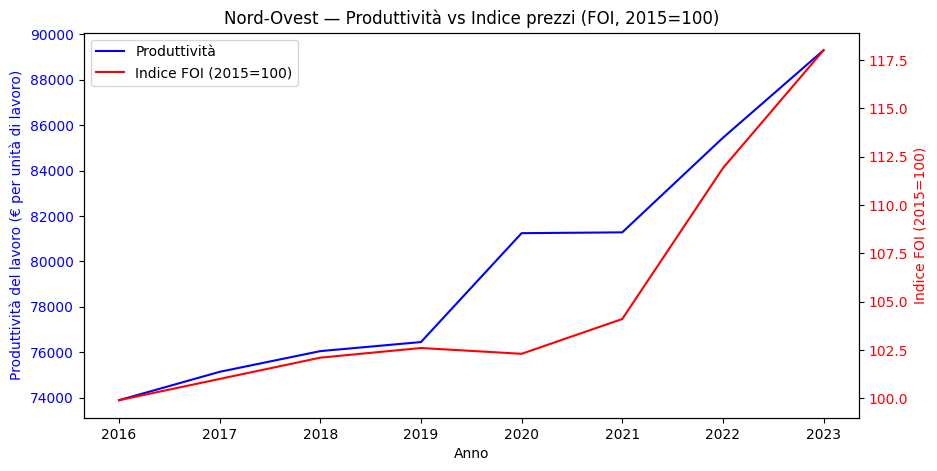

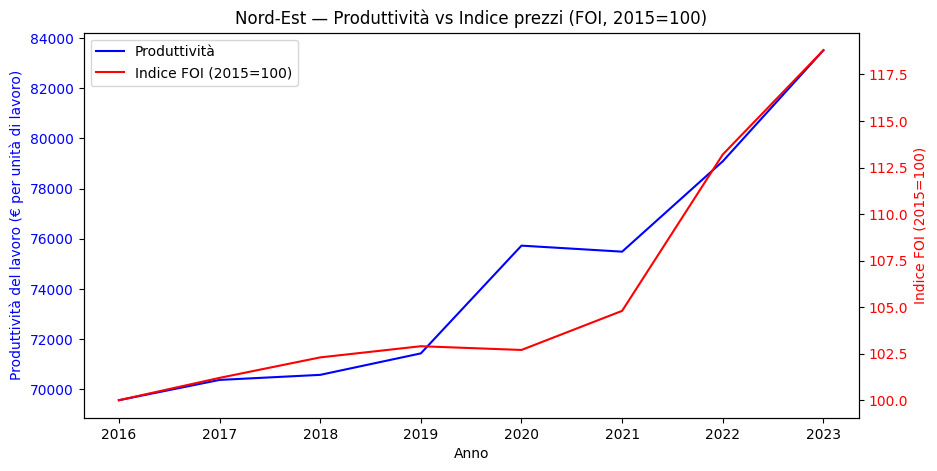

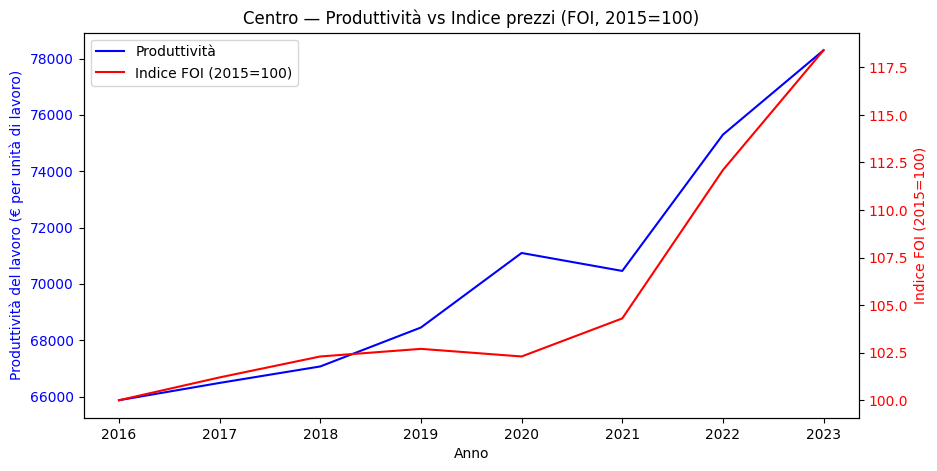

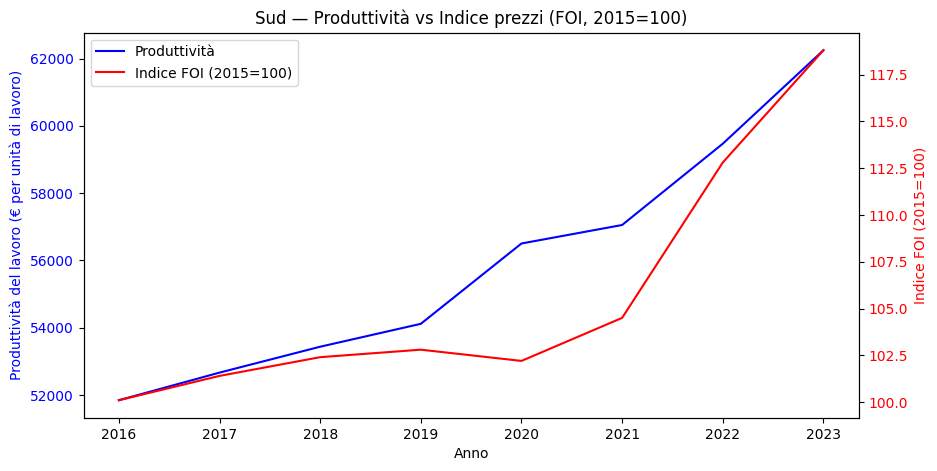

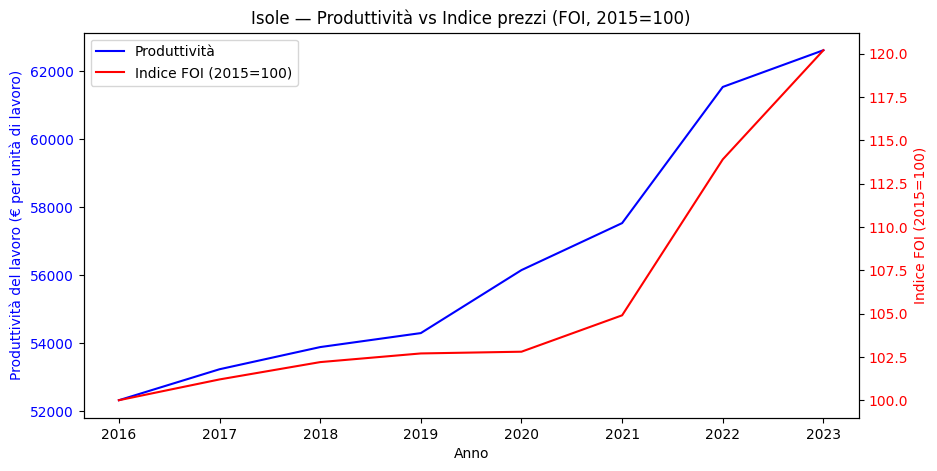

In [12]:
import matplotlib.pyplot as plt

areas = df_final["area"].unique()

for area in areas:

    subset = df_final[df_final["area"] == area]

    fig, ax1 = plt.subplots(figsize=(10,5))

    # --- PRODUTTIVITÀ ---
    line1 = ax1.plot(
        subset["year"],
        subset["value"],
        color="blue",
        label="Produttività"
    )
    ax1.set_ylabel("Produttività del lavoro (€ per unità di lavoro)", color="blue")
    ax1.set_xlabel("Anno")
    ax1.tick_params(axis="y", labelcolor="blue")

    # --- INFLAZIONE ---
    ax2 = ax1.twinx()

    line2 = ax2.plot(
        subset["year"],
        subset["foi_index"],
        color="red",
        label="Indice FOI (2015=100)"
    )
    ax2.set_ylabel("Indice FOI (2015=100)", color="red")
    ax2.tick_params(axis="y", labelcolor="red")

    # --- LEGENDA COMBINATA ---
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc="upper left")

    plt.title(f"{area} — Produttività vs Indice prezzi (FOI, 2015=100)")
    plt.show()

# 📌 Conclusioni

L’analisi congiunta della produttività del lavoro e dell’indice dei prezzi per macro-area evidenzia alcune dinamiche economiche osservabili nel periodo analizzato (2016–2023).

## Principali osservazioni

- **Eterogeneità territoriale della produttività del lavoro**  
  I dati mostrano differenze rilevanti e persistenti nei livelli di produttività tra le macro-aree italiane. Le aree del Nord presentano valori mediamente più elevati rispetto a Centro, Sud e Isole, indicando la presenza di un divario territoriale strutturale nei livelli di performance economica.

- **Andamento dei prezzi relativamente uniforme tra territori**  
  L’indice dei prezzi al consumo FOI mostra dinamiche simili tra le diverse aree del Paese. Le variazioni territoriali dell’indice risultano contenute rispetto alle differenze osservate nella produttività del lavoro.

- **Aumento marcato dei prezzi nel periodo recente**  
  Tutte le macro-aree mostrano un incremento significativo dell’indice dei prezzi a partire dal 2021, mentre la produttività del lavoro evidenzia una crescita più graduale nel tempo.

- **Dinamiche differenziate tra aree nella produttività**  
  Alcune aree, in particolare Sud e Isole, presentano livelli di produttività mediamente inferiori e dinamiche di crescita più contenute rispetto alle regioni settentrionali, mentre il Centro evidenzia andamenti più variabili nel tempo.

## Interpretazione dei risultati

Nel complesso, i dati evidenziano:

- differenze territoriali marcate nei livelli di produttività del lavoro;
- dinamiche dell’indice dei prezzi relativamente simili tra le macro-aree;
- una crescita dei prezzi più rapida rispetto alla crescita della produttività negli anni più recenti.

Queste evidenze descrivono pattern osservabili nei dati e non implicano relazioni causali tra le variabili analizzate. L’analisi ha carattere descrittivo e mira a documentare le dinamiche economiche territoriali nel periodo considerato.

## Limiti dell’analisi e sviluppi futuri

L’analisi si basa su valori nominali della produttività confrontati con un indice dei prezzi. Per valutare pienamente le condizioni economiche in termini reali sarà necessario deflazionare la produttività utilizzando l’indice FOI e costruire indicatori di valore reale e potere d’acquisto.

Possibili sviluppi futuri includono:

- calcolo della produttività del lavoro a prezzi costanti;
- costruzione di indicatori di valore reale e potere d’acquisto;
- misurazione dell’evoluzione del divario territoriale nel tempo;
- analisi della convergenza o divergenza tra macro-aree;
- integrazione con ulteriori indicatori economici territoriali.

L’integrazione tra indicatori di produttività e dinamiche dei prezzi rappresenta uno strumento utile per l’analisi delle differenze economiche territoriali in Italia.